In [3]:
import numpy as np

In [4]:
# Stirling numbers of second kind
S = [[0 for i in range(1001)] for j in range(1001)]

# Combinations
C = [[0 for i in range(1001)] for j in range(1001)]

In [5]:
def stirling(n,k,S):
#     print(n,k)
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = stirling(n-1,k-1,S) + k*stirling(n-1,k,S)
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = 1 # n! / (n-k)!
    for i in range(n-k+1, n+1):
        c*=i
    C[n][k] = c*stirling(n,k,S)
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += C[n][k] * (z**k)
    return h

# Denominator in Expected no. of colors
def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += k * C[n][k] * (z**k)
    return h

# Denominator in Expected no. of colors squared
def H_t_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += (k**2) * C[n][k] * (z**k)
    return h

def E_cols(n,z,C):
    return H_t(n,z,C)/H(n,z,C)

def Var_cols(n,z,C):
    EX_2 = H_t_t(n,z,C)/H(n,z,C)
    v = EX_2 - (E_cols(n,z,C)**2)
#     if v < 0: print("Negative variance in",n,z,C)
    return v

def std_cols(n,z,C):
    return Var_cols(n,z,C)**(0.5)

In [6]:
for i in range(1001):
    if i%100==0: print(i)
    for j in range(1001):
        stirling(i,j,S)
        combs(i,j,C,S)

0
100
200
300
400
500
600
700
800
900
1000


In [7]:
print("C(4,2):", C[4][2]) #84
print("C(4,.):", C[4][:10])
print ("sum of C(4,.):", sum(C[4]))
print ("H(4,1):", H(4,1,C))
print ("H_t(4,1):", H_t(4,1,C))
print ("H_t_t(4,1):", H_t_t(4,1,C))
print ("E_cols(4,1):", E_cols(4,1,C))
print ("Var_cols(4,1):", Var_cols(4,1,C))
print ("std_cols(4,1):", std_cols(4,1,C))

C(4,2): 84
C(4,.): [0, 4, 84, 144, 24, 0, 0, 0, 0, 0]
sum of C(4,.): 256
H(4,1): 256
H_t(4,1): 700
H_t_t(4,1): 2020
E_cols(4,1): 2.734375
Var_cols(4,1): 0.413818359375
std_cols(4,1): 0.6432871515699656


In [64]:
import matplotlib.pyplot as plt

def plot_expected_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    print(z)
    y = [E_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    y = [std_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Std. num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_avg_std_colors (N):
    max_gamma = 100
    gammas = np.linspace(0, max_gamma, num=100)
    z = [np.e**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,C) for zz in z]
    yerr = [np.real(std_cols(N,zz,C)) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.errorbar(gammas, y, yerr=yerr, marker='o', color='black', capsize=3)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    plt.savefig("Expected_no_colors/avg_std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


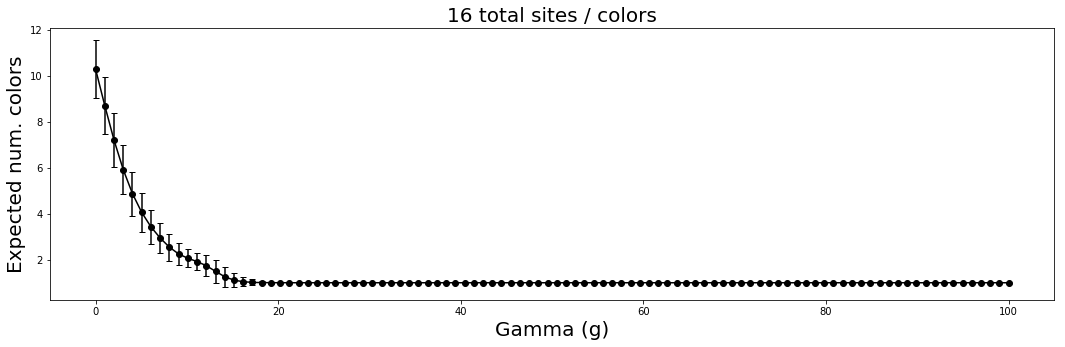

In [69]:
N = 16
# plot_expected_colors(N)
# plot_std_colors(N)
plot_avg_std_colors(N)